## Chapter 3: Evaluation

Looking at different types of evaluation

In [10]:
def accuracy(y_true,y_pred):
    '''
    function to caluclate accuracy
    '''

    correct_counter = 0

    for yt,yp in zip(y_true,y_pred):
        if yt == yp:
            correct_counter += 1

    return correct_counter / len(y_true)

In [11]:
from sklearn import metrics

l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

metrics.accuracy_score(l1,l2)

0.625

In [12]:
accuracy(l1,l2)

0.625

In [13]:
def true_positive(y_true,y_pred):
    '''
    function to true positives
    '''

    tp = 0

    for yt,yp in zip(y_true,y_pred):
        if yt == 1 and yp==1:
            tp += 1

    return tp

def true_negatives(y_true,y_pred):
    '''
    function to true positives
    '''

    tn = 0

    for yt,yp in zip(y_true,y_pred):
        if yt == 0 and yp==0:
            tn += 1

    return tn


def false_positive(y_true,y_pred):
    '''
    function to true positives
    '''

    fp = 0

    for yt,yp in zip(y_true,y_pred):
        if yt == 0 and yp==1:
            fp += 1

    return fp


def false_negatives(y_true,y_pred):
    '''
    function to true positives
    '''

    fn = 0

    for yt,yp in zip(y_true,y_pred):
        if yt == 1 and yp==0:
            fn += 1

    return fn

In [14]:
print(true_positive(l1,l2))

print(false_positive(l1,l2))

print(false_negatives(l1,l2))

print(true_negatives(l1,l2))

2
1
2
3


In [15]:
def precision(y_true, y_pred):
    """
    function to calculate precision
    :param y_true
    :param y_pred
    return precision socre
    """

    tp = true_positive(y_true,y_pred)
    fp = false_positive(y_true,y_pred)
    precision = tp / (tp + fp)
    return precision

In [16]:
precision(y_true,y_pred)

NameError: name 'y_true' is not defined

In [17]:
def recall(y_true, y_pred):
    """
    function to calculate precision
    :param y_true
    :param y_pred
    return recall socre
    """

    tp = true_positive(y_true,y_pred)
    fn = false_negatives(y_true,y_pred)
    recall = tp / (tp + fn)
    return recall

In [18]:
recall(l1,l2)

0.5

In [19]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708,
            0.0490937, 0.0191491, 0.17554844,
            0.15952202, 0.03819563, 0.11639273,
            0.079377, 0.08584789, 0.39095342,
            0.27259048, 0.03447096, 0.04644807,
            0.03543574, 0.18521942, 0.05934905,
            0.61977213, 0.33056815]

In [20]:
precisions = []
recalls = []
# how we assumed these thresholds is a long story
thresholds = [0.0490937 , 0.05934905, 0.079377,
            0.08584789, 0.11114267, 0.11639273,
            0.15952202, 0.17554844, 0.18521942,
            0.27259048, 0.31620708, 0.33056815,
            0.39095342, 0.61977213]
# for every threshold, calculate predictions in binary
# and append calculated precisions and recalls
# to their respective lists
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]
    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    precisions.append(p)
    recalls.append(r)

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'precision')

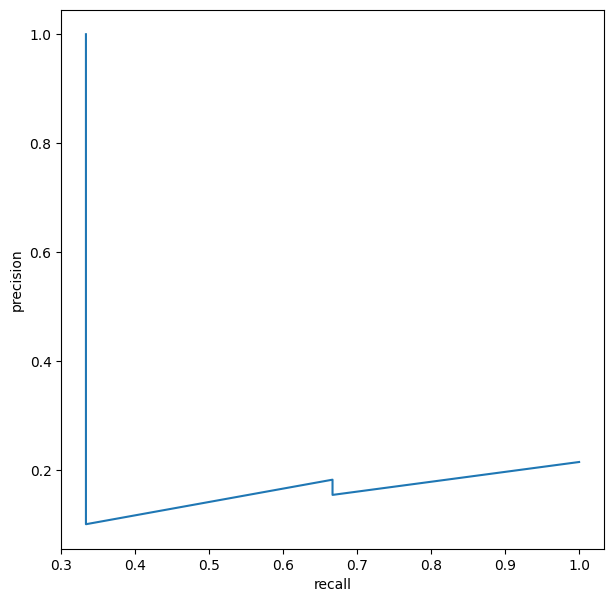

In [22]:
plt.figure(figsize=(7,7))
plt.plot(recalls,precisions)
plt.xlabel('recall')
plt.ylabel('precision')

In [23]:
def f1(y_true,y_pred):
    """
    calculates the F1 statistic
    :param y_true:
    :param y_pred:
    :return: f1 score
    """

    p = precision(y_true,y_pred)
    r = recall(y_true,y_pred)

    f1 = 2 * p * r / (p + r)

    return f1

In [24]:
y_true = [0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0]

y_pred = [0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0]

f1(y_true,y_pred)

0.5714285714285715

In [25]:
from sklearn import metrics

metrics.f1_score(y_true,y_pred)

0.5714285714285714

In [28]:
def tpr(y_true,y_pred):
    """
    Calculates True Positive Rate which is just Recall
    :Param y_true
    :param y_pred
    :return: recall
    """

    return recall(y_true,y_pred)

In [29]:
tpr(y_true,y_pred)

0.6666666666666666

In [30]:
def fpr(y_true, y_pred):
    """
    function to calculate precision
    :param y_true
    :param y_pred
    return recall socre
    """

    fp = false_positive(y_true,y_pred)
    tn = true_negatives(y_true,y_pred)
    fprate = fp / (tn + fp)
    return fprate

In [31]:
fpr(y_true,y_pred)

0.11764705882352941

In [33]:
tpr_list = []
fpr_list = []

#actual values
y_true = [0,0,0,0,1,0,1,
          0,0,1,0,1,0,0,1]

# predicted values

y_pred = [0.1,0.3,0.2,0.6,0.8,0.5,
          0.9,0.5,0.3,0.66,0.3,0.2,
          0.85,0.15,0.99]

# handmade thresholds

thresholds = [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.85, 0.9, 0.99, 1.0]


for thresh in thresholds:
    temp_pred = [1 if x>= thresh else 0 for x in y_pred]

    temp_tpr = tpr(y_true,temp_pred)

    temp_fpr = fpr(y_true, temp_pred)

    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

<function matplotlib.pyplot.show(close=None, block=None)>

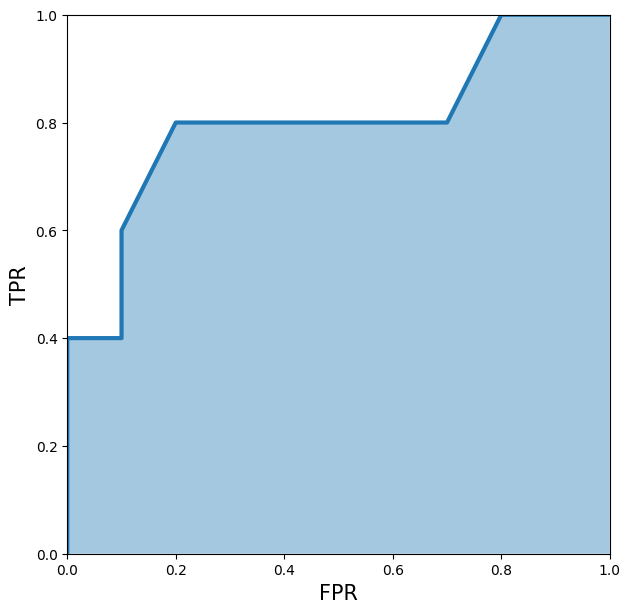

In [35]:
plt.figure(figsize=(7,7))
plt.fill_between(fpr_list,tpr_list,alpha=0.4)
plt.plot(fpr_list,tpr_list,lw=3)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.show

In [36]:
metrics.roc_auc_score(y_true,y_pred)

0.81

In [37]:
tp_list = []
fp_list = [] 

#actual Targets

y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1,0, 1,0,0,1]


In [39]:
import numpy as np

def log_loss(y_true,y_proba):
    """
    Function to calculate log loss
    :param y_true: 
    param y_proba: 
    :return: overall log loss


    """

    epsilon = 1e-15

    loss = []

    for yt, yp in zip(y_true,y_proba):
        yp = np.clip(yp,epsilon, 1-epsilon)

        temp_loss = -1 * (
            yt * np.log(yp)
            + (1-yt) * np.log(1-yp)
        )
        loss.append(temp_loss)

    return np.mean(loss)

In [40]:
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
           0.9, 0.5, 0.3, 0.66, 0.3, 0.2 , 
           0.85, 0.15, 0.99]

log_loss(y_true,y_proba)

0.49882711861432294

In [41]:
metrics.log_loss(y_true,y_proba)

0.49882711861432294